# **Кластеризация на основе плотности**

*Такая кластеризация находит в датасете области с **высокой плотностью** и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.*

Как вы думаете, какие данные могут образовывать датасет с высокой плотностью?

* Данные о заказах такси в пятничный вечер (В пятничный вечер много людей идут отдыхать в театры, рестораны, кино, поэтому плотность данных будет высокой)
* Данные студенческой поликлиники о медицинских анализах (В студенческой поликлинике большинство студентов здоровы, а значит кластеры с отличными показателями организма имеют высокую плотность. Данные оставшихся студентов, имеющих заболевания, будут считаться выбросами на фоне остальных данных)
***

При кластеризации на основе плотности нам **не нужно задавать количество кластеров** — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — DBSCAN. Далее мы рассмотрим его подробнее.

***
## **DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)**

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте:

![](https://lms.skillfactory.ru/assets/courseware/v1/d0259cffa5d96e024250876cc9c79dd4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_33.png)

* в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

***

**Преимущества алгоритма DBSCAN:**

* В отличие от k-means, **не нужно задавать количество кластеров** — алгоритм сам определит оптимальное.
* Алгоритм **хорошо работает с данными произвольной формы**.
* DBSCAN отлично **справляется с выбросами** в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

![](https://lms.skillfactory.ru/assets/courseware/v1/eb707e7b5391cf597f144d873ca4bba6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_34.png)

Как видим, алгоритм DBSCAN хорошо справился с первыми двумя способами кластеризации, а в третьем случае результаты работы обоих алгоритмов несколько спорные. Если датасеты хорошо разделены, как в четвёртом случае, оба алгоритма справляются хорошо. Если данные образуют один участок с одинаковой плотностью данных, DBSCAN не может разделить такие данные.
***

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки  (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

![](https://lms.skillfactory.ru/assets/courseware/v1/6cd2f3a32ee0f26d674c2d419aa9842b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_35.png)

Так как розовый кластер огибает синий, у стандартных методов вроде k-means могут быть трудности при кластеризации. При использовании k-means мы можем получить следующие результаты:

![](https://lms.skillfactory.ru/assets/courseware/v1/70b459664cbe210d49209c11ffb98dcd/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_36.png)

Алгоритм DBSCAN поможет не допустить такого.

→ Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

**Рассмотрим работу алгоритма кластеризации DBSCAN**

1. Сначала необходимо **выбрать случайный объект в данных** (на рисунке выбранная точка выделена красным) и в некотором радиусе  от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

![](https://lms.skillfactory.ru/assets/courseware/v1/2874ac96a6e3c34c251cc5583fd1eb0d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_37.png)

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

![](https://lms.skillfactory.ru/assets/courseware/v1/ec279bb7e7cda505b9a555c441bae580/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_38.png)

2. **Выделим центральные точки (core points)**.

***Центральными будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.***

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

![](https://lms.skillfactory.ru/assets/courseware/v1/e73a531642b7f18b3bf6e8fd9b0166a4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_39.png)

3. **Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки**:

![](https://lms.skillfactory.ru/assets/courseware/v1/3edfba34f9bd0a5bb4a76e31ce5cf773/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_40.png)

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка **не будет добавлена в кластер**. Таким образом, мы получили первый, розовый, кластер:

![](https://lms.skillfactory.ru/assets/courseware/v1/21f6ce62ff43cb3ea299e6d1f4e98a3e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_41.png)

4. После того как центральные точки в первом кластере заканчиваются, мы **начинаем находить нецентральные точки**, которые располагаются в радиусе  от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

![](https://lms.skillfactory.ru/assets/courseware/v1/9ee6eb5db6d4d0b223b0bc405bb8b7b3/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_42.png)

5. Далее **переходим к неразмеченной области в данных** (второй кластер с красными точками). **Заново повторяем алгоритм, начиная с пункта 3**, и в итоге получаем второй, синий, кластер:

![](https://lms.skillfactory.ru/assets/courseware/v1/80b02aeb8be89fd57eedb5913e160ba6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_43.png)

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

***
## **ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ DBSCAN?**

Данный алгоритм довольно популярный — областей его применения много.

* Можно использовать DBSCAN **для разработки системы рекомендаций в магазине**. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

*Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.*

* Данный алгоритм успешно справляется с **поиском выбросов в данных**. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

*Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.*

* Часто DBSCAN применяют **для кластеризации геоданных**, так как он может выделять данные сложной формы.

*Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:*

![](https://lms.skillfactory.ru/assets/courseware/v1/2c2c1101acdbea1915db568f69e279a9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_44.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/7702d12d4eb2cb22c85e4ad4e2570a36/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_45.png)

Как мы можем заметить, алгоритм DBSCAN лучше всего справляется с задачей, выделяя сложные участки на карте.

Подробности этого исследования можно посмотреть [**тут**](https://habr.com/ru/company/citymobil/blog/649063/).

***
## **КАК ЗАПУСТИТЬ DBSCAN В SKLEARN?**

Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

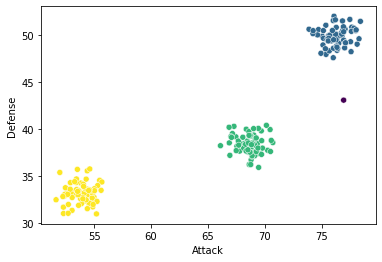

In [12]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd

import seaborn as sns

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
X = df[['Attack', 'Defense']]

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

**Основные параметры для запуска DBSCAN:**

* **eps** — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* **min_samples** — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

***
## **ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN**

### **ПРЕИМУЩЕСТВА**

* **Не нужно задавать количество кластеров.**
* **Устойчив к шуму и выбросам**, может находить выбросы в данных.
* Способен найти **кластеры любой геометрической формы**.

## **НЕДОСТАТКИ**

* **Не может качественно кластеризовать наборы данных с большой разницей в плотности**.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает **сложно подобрать eps**.

***
# **ТАБЛИЦА ВСЕХ АЛГОРИТМОВ КЛАСТЕРИЗАЦИИ**

![](data/f14.PNG)

***
## **ЗАДАЧИ**

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

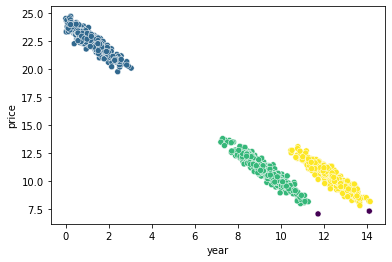

In [16]:
# Для датасета с ценами квартир проведите кластеризацию DBSCAN
# с параметрами по умолчанию. Визуализируйте результаты.
# Сколько точек было размечено как выбросы?

# загружаем данные
df = pd.read_csv('data/housing.csv')
X = df[['year', 'price']]

#запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(df[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.year, df.price, c=clustering.labels_)

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

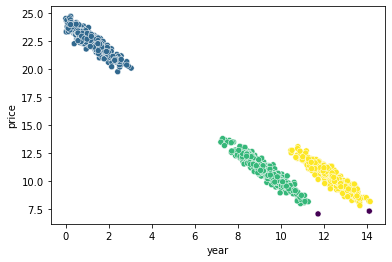

In [19]:
# В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс.
# Так произошло потому, что алгоритм запускался с параметрами по умолчанию.
# Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

# выясняем

# eps = 0.5, min_samples = 5
clustering = DBSCAN(eps = 0.5, min_samples = 5).fit(df[['year', 'price']])
sns.scatterplot(df.year, df.price, c=clustering.labels_)

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

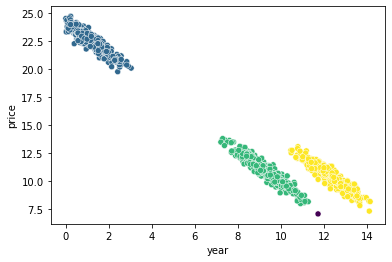

In [20]:
# eps = 0.7, min_samples = 6
clustering = DBSCAN(eps = 0.7, min_samples = 6).fit(df[['year', 'price']])
sns.scatterplot(df.year, df.price, c=clustering.labels_)

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

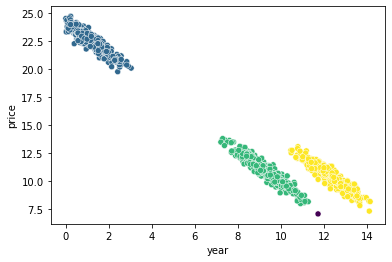

In [21]:
# eps = 0.7, min_samples = 5
clustering = DBSCAN(eps = 0.7, min_samples = 5).fit(df[['year', 'price']])
sns.scatterplot(df.year, df.price, c=clustering.labels_)

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

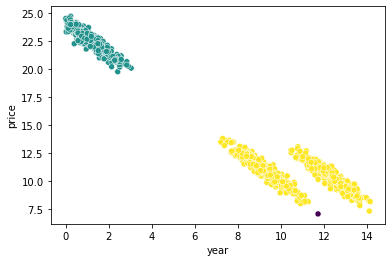

In [22]:
# eps = 1.15, min_samples = 2
clustering = DBSCAN(eps = 1.15, min_samples = 2).fit(df[['year', 'price']])
sns.scatterplot(df.year, df.price, c=clustering.labels_)